# ANALYSE DES RESEAUX SOCIAUX SUR PYTHON

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importation des modules

import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')



In [ ]:
# Reseau symetrique

G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [ ]:
print(nx.info(G_symmetric))

Graph with 6 nodes and 8 edges


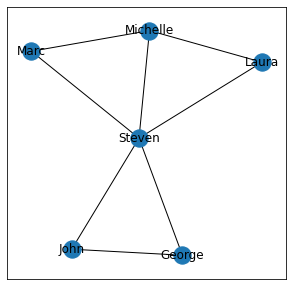

In [ ]:
# Visualisation du reseau

plt.figure(figsize = (5,5))
nx.draw_networkx(G_symmetric);

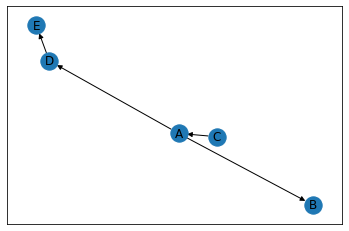

In [ ]:
# reseau asymetrique

G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

nx.spring_layout(G_symmetric)
nx.draw_networkx(G_asymmetric)

In [ ]:
# reseau pondéré

G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)



In [ ]:
G_weighted.edges(data=True)

EdgeDataView([('Steven', 'Laura', {'weight': 25}), ('Steven', 'Marc', {'weight': 8}), ('Steven', 'John', {'weight': 11}), ('Steven', 'Michelle', {'weight': 1}), ('Steven', 'George', {'weight': 4}), ('Laura', 'Michelle', {'weight': 1}), ('Marc', 'Michelle', {'weight': 1}), ('John', 'George', {'weight': 8})])

In [ ]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

In [ ]:
elarge

[('Steven', 'Laura'), ('Steven', 'John')]

In [ ]:
pos = nx.circular_layout(G_weighted)
pos

{'Steven': array([1.00000000e+00, 2.45045699e-08]),
 'Laura': array([0.49999998, 0.86602546]),
 'Marc': array([-0.50000004,  0.8660254 ]),
 'John': array([-9.99999970e-01, -6.29182054e-08]),
 'Michelle': array([-0.49999989, -0.86602541]),
 'George': array([ 0.49999992, -0.86602541])}

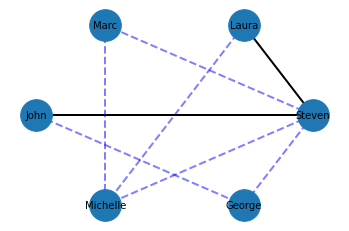

In [ ]:
nx.draw_networkx_nodes(G_weighted, pos, node_size=1000)
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=2)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=2, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show();

In [ ]:
# Coefficient de regroupement
nx.clustering(G_symmetric, "Laura")

1.0

In [ ]:
nx.average_clustering(G_symmetric)

0.8277777777777778

In [ ]:
# mesure de distance du réseau
# degré

nx.degree(G_symmetric, "Michelle")

3

In [ ]:
# distance
# le chemin le plus court

nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [ ]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

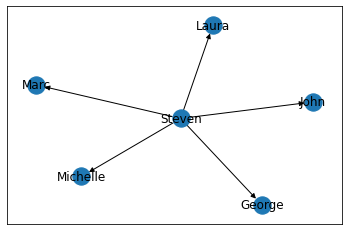

In [ ]:
# Recherche de l'etendue

S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

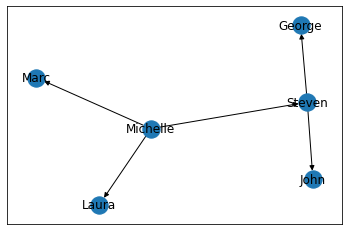

In [ ]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

In [ ]:
# Excentricité
nx.eccentricity(G_symmetric, 'Michelle')

2

In [ ]:
# Centralité des reseaux
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

In [ ]:
# Centralité des vecteurs propres
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [ ]:
# centralité de proximité
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

In [ ]:
# centralité intermediaire
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

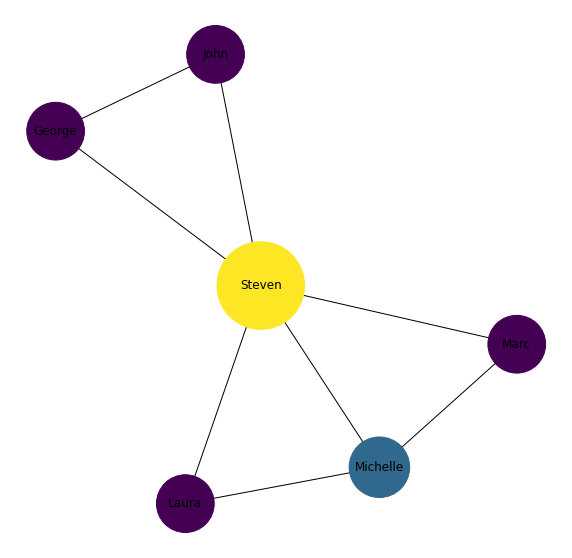

In [ ]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']

In [ ]:
# Etude du cas de facebook

import pandas as pd

df = pd.read_csv('/content/facebook_combined.txt')
df.head()



,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [ ]:
G_fb = nx.read_edgelist('/content/facebook_combined.txt', 
                        create_using = nx.Graph(), 
                        nodetype=int)

print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


In [ ]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


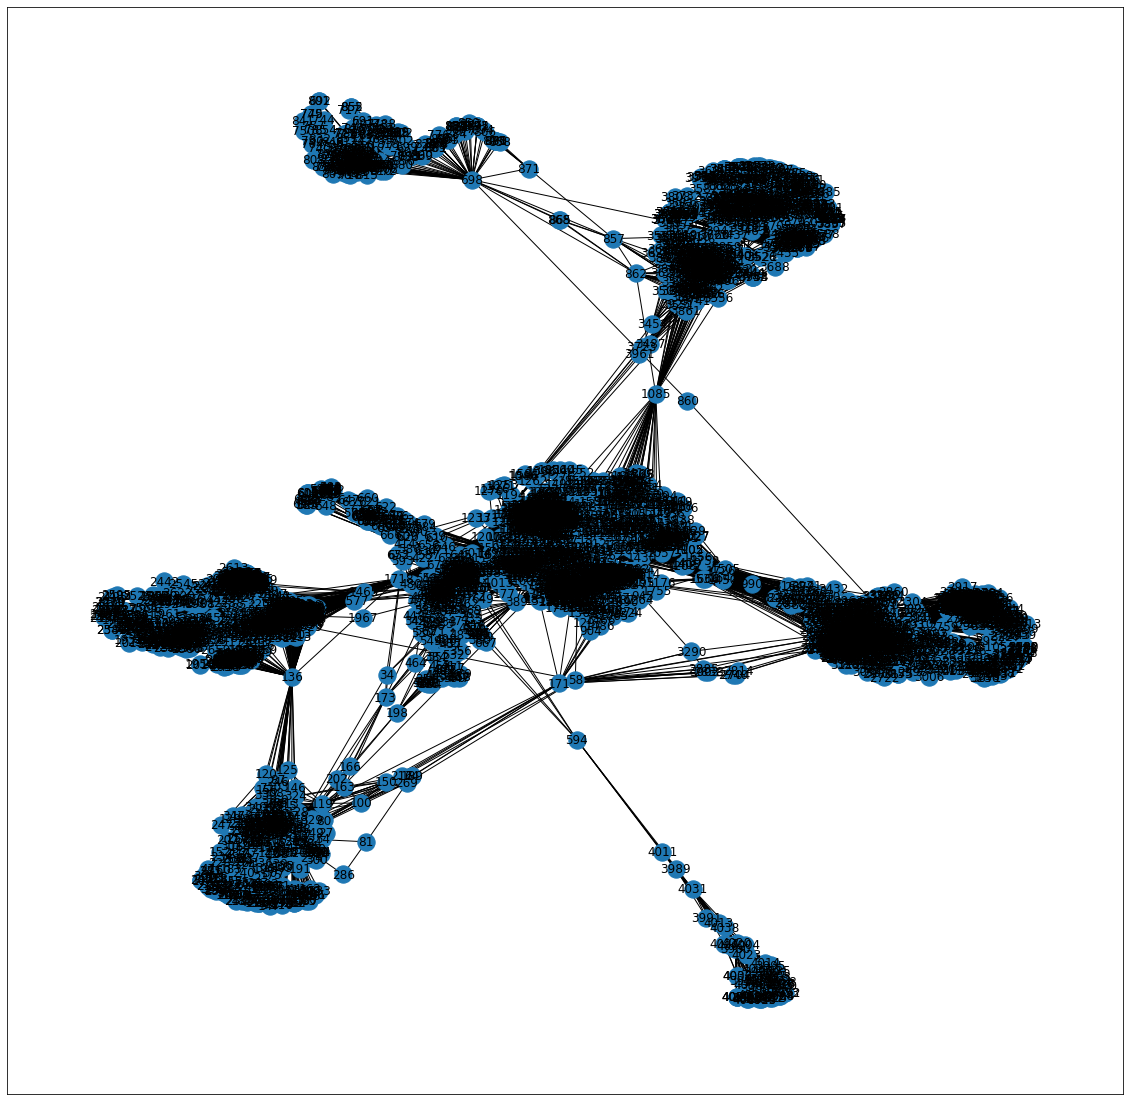

In [ ]:
plt.figure(figsize = (20,20))
nx.draw_networkx(G_fb)

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Steven', 'Michelle', 'Laura', 'Marc', 'John']